# DSTEP20 // Assignment #1 **(GGD: Total = 40 / 45)**
# Teddy Katayama

assigned : **Jan 7, 2020**

DUE : **Jan 14, 2020 11:59pm**

## When will New Castle Battery Park be underwater?

![alt text](https://lh5.googleusercontent.com/p/AF1QipNu7_-CRmvQTqI7m_V693kOu_IzeeDVYw2Do2UT=w408-h306-k-no)

---

# Assignment 1

## Part 1 Background **(GGD: +5)**
> Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits. To that end:

**Provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future. Potential topics to consider and address include:**

1. **description of historical sea level measurements**
2. **what open satellite data exist and where they can be located**
3. **characteristic numbers for sea level measurements over time**
4. **why sea level might change as the climate changes**
5. **variation in sea level rise across the globe**
6. **what projections exist for the future of sea level rise**
7. **how coastal communities are mitigating the consequences of sea level rise**
8. **potential economic costs of sea level rise**
9. **potential social costs of sea level rise**


**Please include references within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).**

Globally, the measured sea-level continues to be rising.  The observed increase in [Ice Loss](https://sealevel.nasa.gov/understanding-sea-level/global-sea-level/ice-melt) and [Thermal Expansion](https://sealevel.nasa.gov/understanding-sea-level/global-sea-level/thermal-expansion) are considered by NASA as key contributing factors.  Global warming of the Earth is causing increases in ice loss from glaciers and ice sheets near the poles.  Additionally, global warming is causing the sea-level to rise in that ocean water expands as it warms.  Continued rise in sea-level will result with costal communities to be consumed by ocean water.

Over the years, several methods to measure sea-level have emerged.  Historcal data use the mean derived from [Tide Gauages](https://en.wikipedia.org/wiki/Tide_gauge) that measure the level seen at high and low tides.  Modern data use [Satellite Radar Altimertry](https://earth.esa.int/web/guest/news/-/article/satellite-radar-altimetry-past-and-future): TOPEX/Posidon (1992-2006), Jason 1 (2001-2013), Jason 3 (2015), OSTM/Jason 2 (2008-Present), Jason CS (2020), SWOT (2020) [satellities](https://sealevel.nasa.gov/understanding-sea-level/global-sea-level/thermal-expansion).  Publicly accessible data: [CSIRO](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/), [datahub.io](https://datahub.io/core/sea-level-rise), [USGS](https://waterdata.usgs.gov/nwis/sw)




## PART 2 - Loading and plotting the data **(GGD: +9)**

###### **Read in the CSIRO data from the link above labeled CSV. (GGD: +2)**
---


In [0]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

csiro_csv = 'https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv'
!curl -sNL $csiro_csv | head -n 2

Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
1880-03-15,0,-0.952755905,0.952755905,


In [0]:
df = pd.read_csv(csiro_csv, header=0)
display(df.head(2))
display(df.tail(2))

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
133,2013-03-15,8.980315,8.622047,9.338583,8.546648
134,2014-03-15,NaN,NaN,NaN,8.663700


###### **Take the minimum across the "CSIRO Adjusted Sea Level" and "NOAA Adjusted Sea Level" colmuns and add it to the DataFrame as a column called "min_level" (GGD: +2)**
---

In [0]:
df['min_level'] = df[[df.columns[1], df.columns[4]]].min(axis=1) # df[df.columns[1:5]].min(axis=1)
display(df.head(2))

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472


###### **The CSIRO sea level data is in inches. Convert the min_level column to millimeters. (GGD: +2)**
---

In [0]:
df['min_level'] = df['min_level'] * 25.4
# df['min_level'] = df['min_level'].apply(lambda x: (x * 25.4))
display(df.head(5))

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.0
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,5.6
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-11.2
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-5.9
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,15.0


###### Notice that the CSIRO time data is actually a string and includes months and dates. **Use the cell below to create a column called "year_int" that is the CSIRO year as an integer so that we don't have to worry about the months and dates from now on.**
---

In [0]:
# a = pd.to_datetime('1880-03-15', infer_datetime_format=True)
df["year_int"] = [int(i[:4]) for i in df["Year"]]
display(df.head(2))

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,year_int
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.0,1880
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,5.6,1881


###### **Make a plot of the sea-level as a function of time. (GGD: +2 [ok, but the legend is not necessary in this plot])**
---

Text(0.5, 0, 'Year [year]')

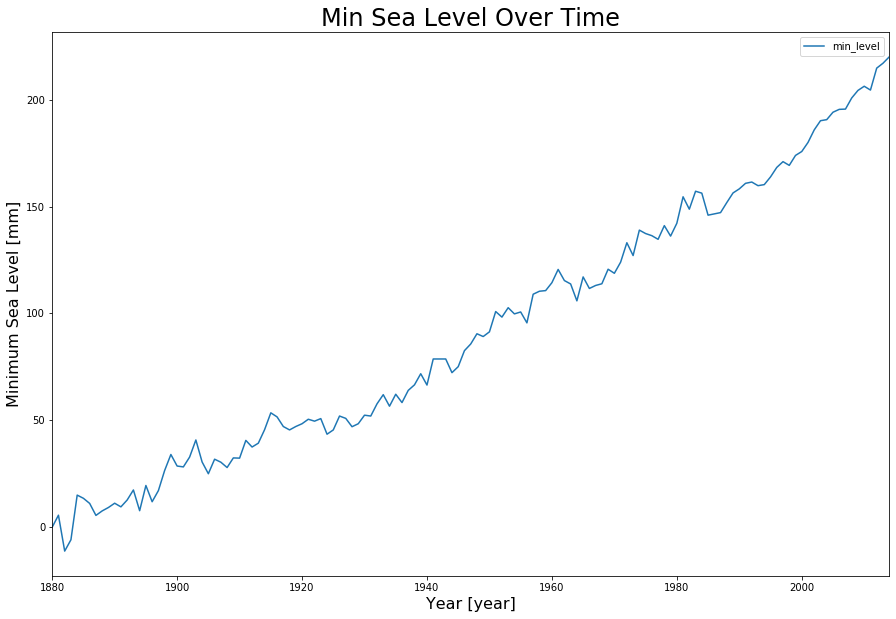

In [0]:
ax = df.plot(x = 'year_int', y = 'min_level', figsize = (15,10))
ax.set_title('Min Sea Level Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)

###### **Describe what information is conveyed by this plot. i.e, write a caption for the plot. (GGD: +1 [not exactly true..., e.g., 1880 vs 1882])**
---

The minimum sea-level is continually increasing over time.

## PART 3 - Fitting a linear model **(GGD: +8)**
> As we did in class, your goal here is to estimate the rate of sea level rise. However, we now have a much longer temporal baseline.

###### **Using the statsmodels api, fit a linear model to the data: (GGD: +2)**

\begin{equation*}
sea\_level = {a_1 * time + a_0}
\end{equation*}

In [0]:
model = smf.ols(formula = "min_level ~ year_int", data=df)
result = model.fit()
pred = result.predict(df)

print(result.summary())
print(np.linalg.cond(result.model.exog))

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6040.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          1.03e-112
Time:                        03:20:19   Log-Likelihood:                -488.45
No. Observations:                 135   AIC:                             980.9
Df Residuals:                     133   BIC:                             986.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2943.6655     39.074    -75.335      0.0

<b>What is the rate of sea level rise that you find with this linear model fit to the CSIRO data? (GGD: +2)</b>

In [0]:
result.params[1]

1.559374811858191

The rate of sea level rise is **1.5594 mm** per year

**Plot the CSIRO data with your best fit linear model overlaid. (GGD: +2 [ok, but better would be a legend for the two])**

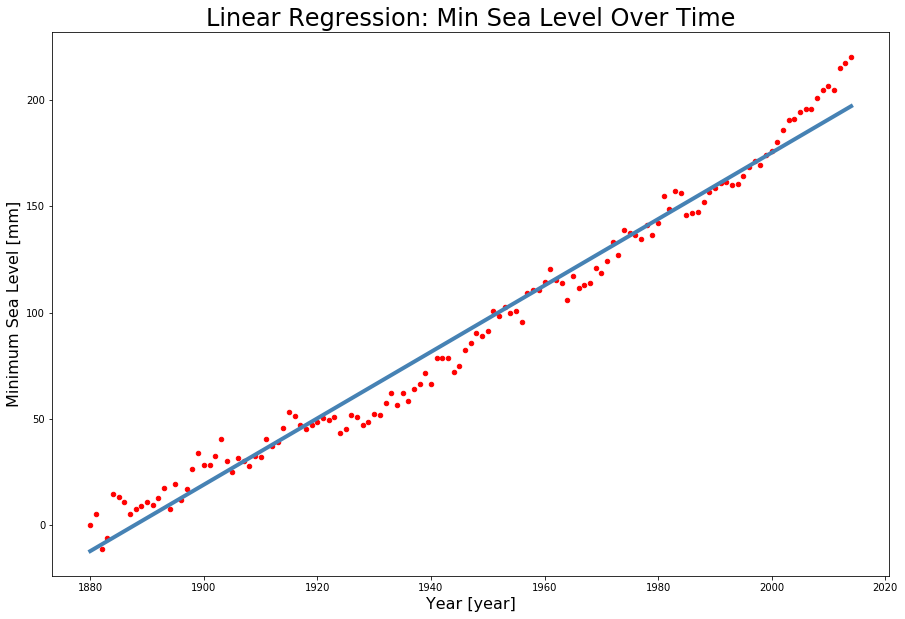

In [0]:
ax = df.plot.scatter("year_int", "min_level", color="red", figsize=(15, 10))
ax.set_title('Linear Regression: Min Sea Level Over Time', fontsize = 24)
ax.set_xlabel('Year [year]', fontsize = 16)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.plot(df["year_int"], pred, color="steelblue", lw=4)

**Describe what information is conveyed by this plot. (GGD: +1 [but what is the relationship between the data and the model?])**

The <font color='red'>red points</font> in the plot represent the **actual** minimum sealevel recorded for each year.  The <font color='blue'>blue line</font> in the plot represent the **predicted** sealevel for each year. 
[link text](https://)

**Would you consider this model a "good" fit to the data?  Why or why not? (GGD: +1 [what about statistical evidence?])**

I would consider this model to be an **okay** fit as the prediction line does match with the general flow of actual points.  However, the majority of the actual points do not lie on the predicted line. 

## PART 4 - Comparing Multiple Model Predictions **(GGD: +13)**

**Using the statsmodels api, fit a model to the CSIRO data that includes both a linear and quadratic dependence on time. (GGD: +2)**

In [0]:
# -- build the quadratic model
model2 = smf.ols("min_level ~ np.power(year_int, 2) + year_int", data=df)

# -- now fit the model to the data
result2 = model2.fit()

# -- predict the min_level with the new model
pred2 = result2.predict(df)

# -- summarize the fit
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7074.
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          5.54e-135
Time:                        03:20:20   Log-Likelihood:                -431.32
No. Observations:                 135   AIC:                             868.6
Df Residuals:                     132   BIC:                             877.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.607e+

**Plot the CSIRO data with both the linear model and quadratic model overlaid. (GGD: +2)**

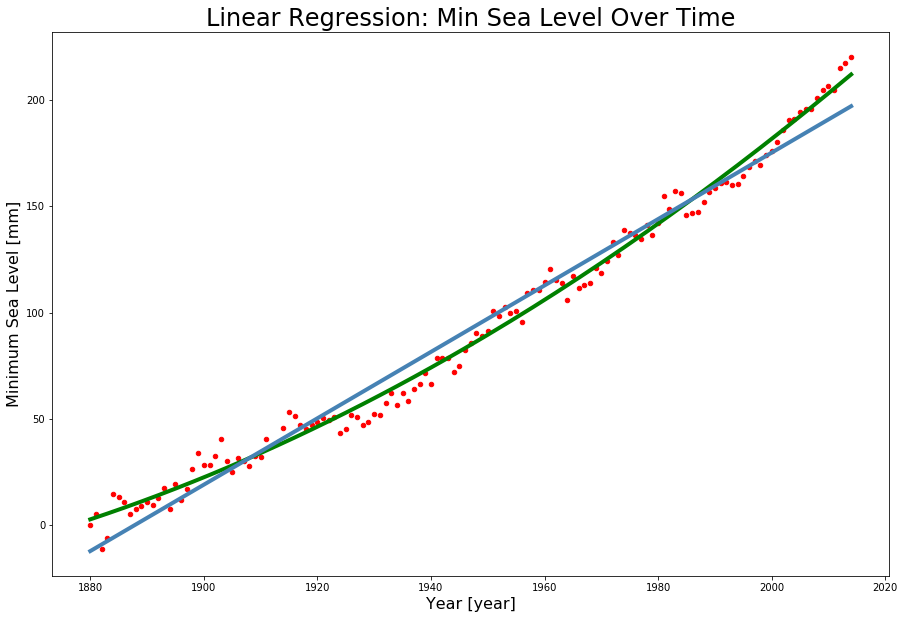

In [0]:
# -- make the plot
ax = df.plot.scatter(x = "year_int", y = "min_level", color="red", figsize=(15, 10))
ax.set_title('Linear Regression: Min Sea Level Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)
ax.plot(df["year_int"], pred2, color="green", lw=4)
ax.plot(df["year_int"], pred, color="steelblue", lw=4)

**Describe what information is conveyed by this plot. (GGD: +1 [same as above])**

The <font color='red'>red points</font> in the plot represent the **actual** minimum sealevel recorded for each year.  The <font color='blue'>blue linear line</font> in the plot represent the **predicted** sealevel for each year.  The <font color='green'>green quadratic line</font> in the plot represent the **predicted** sealevel for each year. 

**Determine the probability that the quadratic model is a better fit to the data using a likelihood ratio test. (GGD: +2 [incorrect interpretation of p-value; see solutions])**

In [0]:
# -- likelihood ratio test
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0} | {1}".format(round(pval, 3), pval))

p-value: 0.0 | 1.146948766307778e-26


Using the likelihood ratio test we observe a low p-value which indicates that the linear model is a sufficient fit and not rejected.

**Using Google Earth to determine the elevation of New Castle Battery Park, in what year will it be under water due to rising sea level? (GGD: +1 [below you calculate when sea level will be >1000mm, but sea level is not 0mm now])** 

![https://github.com/kkatayama/Data_Science/raw/master/assignments/d_park.png](https://github.com/kkatayama/Data_Science/raw/master/assignments/d_park.png)

Using Google Earth, I deteremined the elevation of New Castle Battery Park to be **1 m** (1000 mm).

## Findings

**Summarize your findings throughout this notebook.  What are the key take aways from your analysis?  What are some of the shortcomings, potential biases, inaccuracies, assumptions, or approximations that you have made through out? (No more than 500 words) (GGD: +5)**

In [0]:
for i in range(2014, 2600):
  if result.predict({"year_int": i})[0] > 1000.0:
    print('linear model extrapolation: {}'.format(i))
    break
for i in range(2014, 2600):
  if result2.predict({"year_int": i})[0] > 1000.0:
    print('quadratic model extrapolation: {}'.format(i))
    break

linear model extrapolation: 2530
quadratic model extrapolation: 2247


The **quadratic** model predicts that the New Castle Battery Park will be under water in the year **2247**.

The **linear** model predicts the year **2530**

With the current trend of sea-level rise, it is inevitable that New Castle Battery Park will one day be under water.  Both of predictive models suggest this.  After likelihood test, we should follow the linear model and predict that by 2530, New Castle Battery Park will be under water.  As more data becomes available, the predictions will improve in accuracy.  Nevertheless, it is important that costal communities prepare for this as it is not a matter of "if" the coast will become submerged, but rather "when"!

# **EXTRA CREDIT - Local Effects (GGD: +5)**

Notice this image:

![alt text](https://md.water.usgs.gov/gage_images/01482170.JPG)

That is a picture of a tide gauge in New Castle Battery Park.  So far we've been using global sea level as a data set for predicting when Battery Park will be underwater, but the rate of sea level rise is known to vary with location.  The USGS provides data going back to 2012.  Using the New Castle tide gauge data available from USGS, how would your answers about when New Castle Battery Park will be underwater change?$^{\dagger}$

<small><i>$^{\dagger}$ Note, this "Extra Credit" section is significantly more tricky than the previous sections! </i></small>

**(GGD: this is *excellent*)**

## Explore Data

#### **USGS 01482170 DELAWARE RIVER AT NEW CASTLE, DE**
[https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=01482170](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=01482170)

![http://md.water.usgs.gov/gage_images/01482170_fld.JPG](http://md.water.usgs.gov/gage_images/01482170_fld.JPG)

Google Earth Elevation Estimation 
[Google Earth Link](https://earth.google.com/web/@39.65130871,-75.58688042,-2.78903719a,39.98934937d,35y,-169.75097397h,44.99455667t,0r/data=CjkaNxIxCgAZpE5AE2HTQ0AhOuQL_47lUsAqGzM5wrAzOScwNS4wIk4gNzXCsDM1JzEyLjciVxgBIAE)
![https://raw.githubusercontent.com/kkatayama/Data_Science/master/assignments/extra.png](https://raw.githubusercontent.com/kkatayama/Data_Science/master/assignments/extra.png)



#### **Pull USGS Data**

In [0]:
### Updated Every 6 minuts ###
# df = pd.read_html('https://nwis.waterdata.usgs.gov/de/nwis/uv/?cb_00065=on&format=html&site_no=01482170&period=&begin_date=2012-04-01&end_date=2020-01-14', header=0)[2][:240]

### Daily Results ###
df = pd.read_html('https://waterdata.usgs.gov/nwis/dv?cb_00065=on&format=html&site_no=01482170&referred_module=sw&period=&begin_date=2012-04-01&end_date=2020-01-15', header=0)[2]
df.head()

,Date,"Gageheight, feet,(Tidal High (Daily))","Gageheight, feet,(Tidal Low (Daily))"
0,04/05/2012,3.98A,-2.48A
1,04/06/2012,3.66A,-3.00A
2,04/07/2012,2.99A,-3.31A
3,04/08/2012,4.01A,-3.12A
4,04/09/2012,3.80A,-3.56A


#### **Cleanup Data**

In [0]:
# Remove 'A' - Approved for Publication and 'P' - Provisional Arguments
df['high_tide']  = df['Gageheight, feet,(Tidal High (Daily))'].str.replace('A', '').str.replace('P','').astype('float')
df['low_tide']   = df['Gageheight, feet,(Tidal Low (Daily))'].str.replace('A', '').str.replace('P','').astype('float')

# Compute 'min_level' using mean
df['min_level'] = df[['high_tide','low_tide']].mean(axis=1)

# Convert 'feet' to 'millimeters'
df['min_level'] = df['min_level'] * 304.8

# Convert 'Date' to 'year.float()'
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['date_float'] = df['Date'].dt.year + (df['Date'].dt.dayofyear - 1) / 365.0
display(df.head(2))
display(df.tail(2))

,Date,"Gageheight, feet,(Tidal High (Daily))","Gageheight, feet,(Tidal Low (Daily))",high_tide,low_tide,min_level,date_float
0,2012-04-05,3.98A,-2.48A,3.98,-2.48,228.600,2012.260274
1,2012-04-06,3.66A,-3.00A,3.66,-3.00,100.584,2012.263014


,Date,"Gageheight, feet,(Tidal High (Daily))","Gageheight, feet,(Tidal Low (Daily))",high_tide,low_tide,min_level,date_float
2838,2020-01-12,2.90P,-3.48P,2.90,-3.48,-88.392,2020.030137
2839,2020-01-13,3.47P,-3.29P,3.47,-3.29,27.432,2020.032877


#### **Sanity Check!**
[https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=01482170](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=01482170)

**EXTREMES FOR PERIOD OF RECORD.**--Maximum elevation, 7.2 ft, Oct. 30, 2012 (from high-water mark);
    minimum elevation, unknown.

**For Jan 13, max = 3.47, min = -3.29**

In [0]:
df['high_tide'].max()

7.2

In [0]:
temp_df = pd.read_html('https://waterdata.usgs.gov/de/nwis/uv?cb_00065=on&format=html&site_no=01482170&period=&begin_date=2020-01-13&end_date=2020-01-13', header=0)[2][:240]
display(temp_df.head(1))
display(temp_df.tail(1))
temp_df['val'] = temp_df['Jan 13'].str.replace('A', '').str.replace('P','').astype('float')

# For Jan 13, should be (3.47, -3.29)
print('max = ', temp_df['val'].max())
print('min = ', temp_df['val'].min())

,TIME,Jan 13
0,00:00 EST,1.32P


,TIME,Jan 13
239,23:54 EST,1.87P


max =  3.47
min =  -3.29


#### **Time Series Plot**

Text(0.5, 0, 'Year [year]')

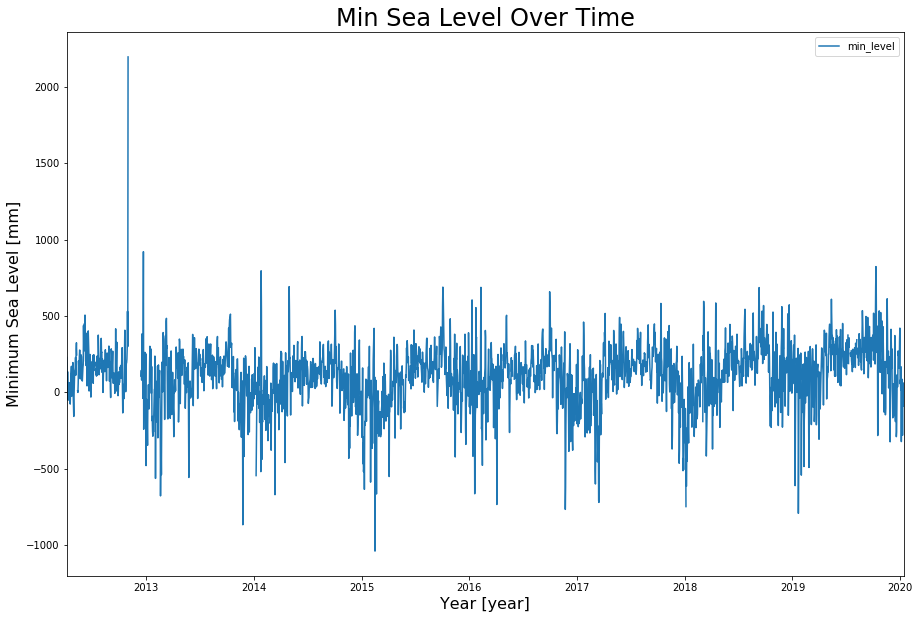

In [0]:
ax = df.plot(x = 'date_float', y = 'min_level', figsize = (15,10))
ax.set_title('Min Sea Level Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)

## Fitting Linear Model

In [0]:
model = smf.ols(formula = "min_level ~ date_float", data=df)
result = model.fit()
pred = result.predict(df)
print(result.summary())
print(np.linalg.cond(result.model.exog))

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     40.18
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           2.69e-10
Time:                        04:31:50   Log-Likelihood:                -18643.
No. Observations:                2780   AIC:                         3.729e+04
Df Residuals:                    2778   BIC:                         3.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.147e+04   3404.640     -6.306      0.0

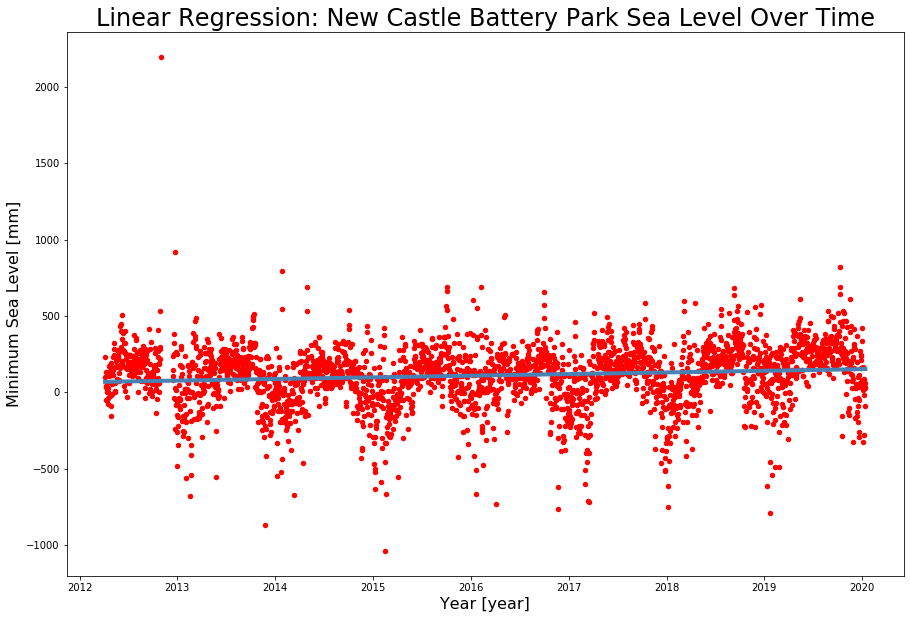

In [0]:
ax = df.plot.scatter("date_float", "min_level", color="red", figsize=(15, 10))
ax.set_title('Linear Regression: New Castle Battery Park Sea Level Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)
ax.plot(df["date_float"], pred, color="steelblue", lw=4)

In [0]:
print(result.params[1])

10.704501525545403


The rate of sea level rise at New Castle Battery Park is **10.7045 mm** per year

## Compare Multiple Models

In [0]:
# quadratic model
model2 = smf.ols("min_level ~ np.power(date_float, 2) + date_float", data=df)
result2 = model2.fit()
# -- predict the min_level with the new model
pred2 = result2.predict(df)

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              min_level   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     59.72
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           4.04e-26
Time:                        03:20:27   Log-Likelihood:                -18605.
No. Observations:                2780   AIC:                         3.722e+04
Df Residuals:                    2777   BIC:                         3.723e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

#### **Plot Multiple Models**

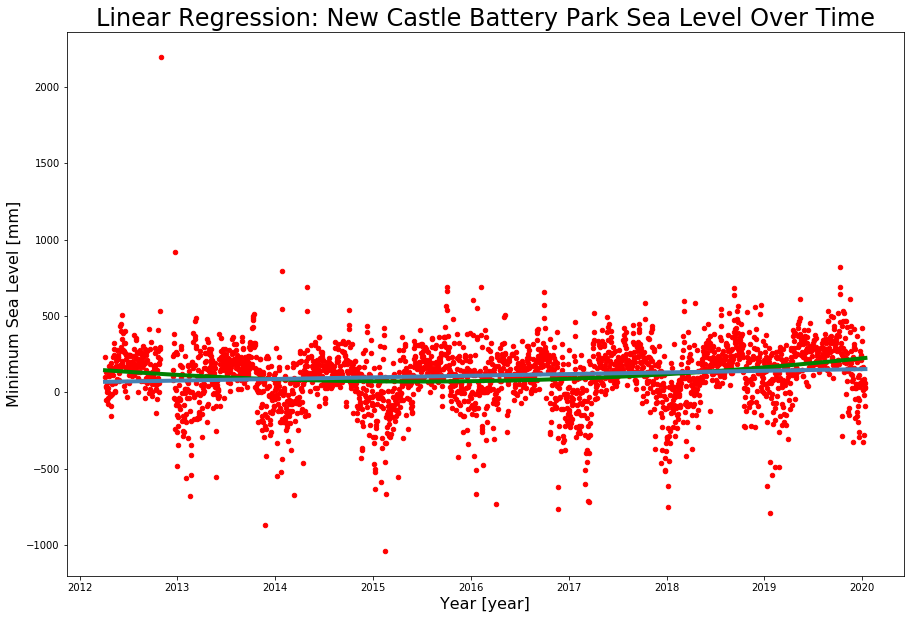

In [0]:
ax = df.plot.scatter(x = "date_float", y = "min_level", color="red", figsize=(15, 10))
ax.set_title('Linear Regression: New Castle Battery Park Sea Level Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)
ax.plot(df["date_float"], pred2, color="green", lw=4)
ax.plot(df["date_float"], pred, color="steelblue", lw=4)

#### **Likelihood Ratio Test**

In [0]:
# -- likelihood ratio test
lr, pval, ddof = result2.compare_lr_test(result)
print("p-value: {0} | {1}".format(round(pval, 3), pval))

p-value: 0.0 | 1.5910535528583211e-18


Using the likelihood ratio test we observe a low p-value which indicates that the linear model is a sufficient fit and not rejected.

## Findings

In [0]:
for i in np.arange(2014, 2600, ((2 - 1) / 365.0)):
  if result.predict({"date_float": i})[0] > 1000.0:
    print('linear model extrapolation: {}'.format(i))
    break
for i in np.arange(2014, 2600, ((2 - 1) / 365.0)):
  if result2.predict({"date_float": i})[0] > 1000.0:
    print('quadratic model extrapolation: {}'.format(i))
    break

linear model extrapolation: 2099.2027397247875
quadratic model extrapolation: 2026.7123287669383


In [0]:
print(result.predict({"date_float": 2099})[0])
print(result.predict({"date_float": 2100})[0])

997.839386911055
1008.5438884365976


The **quadratic** model predicts that the New Castle Battery Park will be under water in the year **2027**.

The **linear** model predicts the year **2100** (or rather April 11, 2099 and beyond)

Using the New Castle tide gauge data available from [USGS](https://waterdata.usgs.gov/nwis/dv?referred_module=sw&site_no=01482170) along with the linear model, New Castle Battery Park is predicted to be under water in The year **2100**!

## **Future Prediction Plot**


In [0]:
df['prediction'] = pred

In [0]:
df.tail(1)

,Date,"Gageheight, feet,(Tidal High (Daily))","Gageheight, feet,(Tidal Low (Daily))",high_tide,low_tide,min_level,date_float,prediction
2839,2020-01-13,3.47P,-3.29P,3.47,-3.29,27.432,2020.032877,152.536


In [0]:
start_date = (df[df['Date'] == '2020-01-13']['Date'] + pd.DateOffset(days=1))[2839]
start_date

Timestamp('2020-01-14 00:00:00')

In [0]:
pred[2838:]

2838    152.506368
2839    152.535695
dtype: float64

In [0]:
index = 2839
for i in range(1, 33000):
  pred_date = (start_date + pd.DateOffset(days=i))
  pred_date_fl = (pred_date.year + (pred_date.dayofyear - 1) /365.0)
  pred_fl = result.predict({"date_float": pred_date_fl})
  df = df.append({'Date': pred_date, 'date_float': pred_date_fl, 'prediction': pred_fl}, ignore_index=True)

In [0]:
df['prediction'] = df['prediction'].astype('float')
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['date_float'] = df['Date'].dt.year + (df['Date'].dt.dayofyear - 1) / 365.0

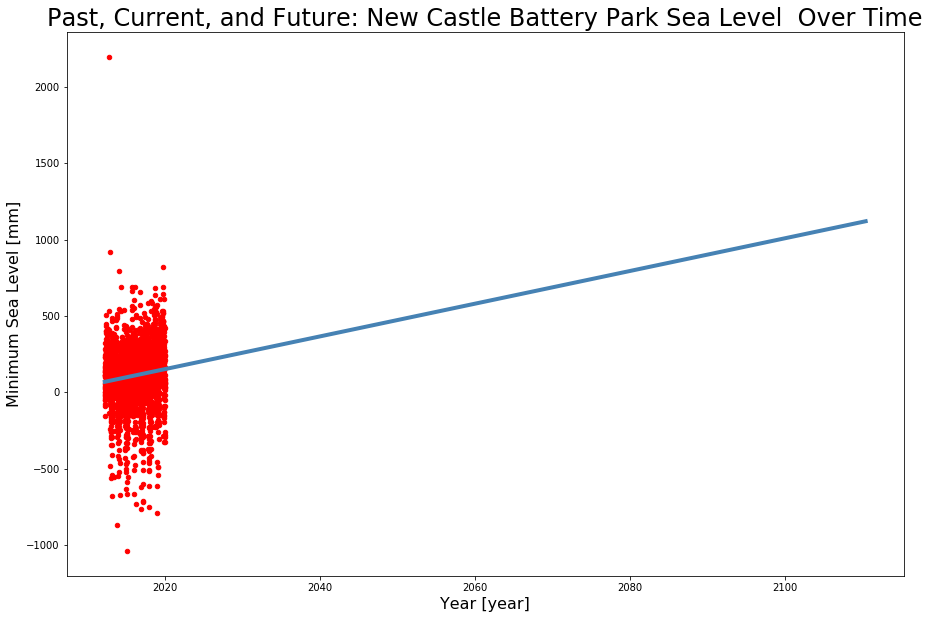

In [0]:
ax = df.plot.scatter("date_float", "min_level", color="red", figsize=(15, 10))
ax.set_title('Past, Current, and Future: New Castle Battery Park Sea Level  Over Time', fontsize = 24)
ax.set_ylabel('Minimum Sea Level [mm]', fontsize = 16)
ax.set_xlabel('Year [year]', fontsize = 16)
ax.plot(df["date_float"], pred, color="steelblue", lw=4)